In [1]:
import sympy
sympy.init_printing()

# Diagramas de bloques

Es conveniente analizar sistemas elaborados como una combinación de sistemas más sencillos. 


A continuación los principales tipos de combinación.

## Concatenación / Serie

Cuando dos sistemas LTI $H_1$ y $H_2$ están interconectados de manera que la salida de $H_1$ es la entrada de $H_2$. Esta es la conexión en **Serie** o **Concatenación de sistemas**.

Suponga que:
- La respuesta impulsional de $H_1$ es $h_1(t)$.
- La respuesta impulsional de $H_2$ es $h_2(t)$.
- La concatenación se excita con una señal $x(t)$.

La salida de $H_1$ es entonces $x(t)*h_1(t)$. La salida de la concatenación de sistemas es:

\begin{equation}
y(t) =  x(t) * h_1(t) * h_2(t)
\end{equation}

En el dominio de Laplace, la convolución anterior se transforma en:

\begin{equation}
Y(s) = \underbrace{H_1(s) \cdot H_2(s)}_{H(s)} \cdot X(s)
\end{equation}

Así, los dos sistemas concatenados tienen una equivalencia $H(s) = H_1(s) \cdot H_2(s)$.

![Dos sistemas concatenados](figuras/concatenation.png)

Si se tienen $N$ sistemas conectados en serie, el modelo equivalente está dado por la multiplicación de las respectivas funciones de transferencia.

\begin{equation}
H(s) = \prod_{n=1}^{N} H_n(s)
\end{equation}


**Ejemplo**

Al concatenar filtros de bajo orden se obtiene un filtro de orden más elevado.

Suponga las siguientes funciones de transferencia para filtros de orden 2.

\begin{equation}
G(s) = \frac{1}{LC s^2 + RC s + 1}
\end{equation}

Si se concatenan $N$ filtros con acoples de impedancia, se obtiene:

\begin{equation}
H_N(s) = \left( \frac{1}{LC s^2 + RC s + 1} \right)^N
\end{equation}


## Paralelo

Cuando dos sistemas LTI comparten la misma entrada y sus salidas se combinan, están conectados en paralelo.

Cuando dos sistemas LTI $H_1$ y $H_2$ están interconectados de manera que tienen la misma entrada y sus salidas se combinan, esta es la conexión en **Paralelo** .

Suponga que:
- La respuesta impulsional de $H_1$ es $h_1(t)$.
- La respuesta impulsional de $H_2$ es $h_2(t)$.
- La conexión paralela se excita con una señal $x(t)$.

La salida de $H_1$ es entonces $x(t)*h_1(t)$. La salida de $H_2$ es entonces $x(t)*h_2(t)$. La salida de la conexión paralela es:

\begin{equation}
y(t) = h_1(t) * x(t) + h_2(t) * x(t)
\end{equation}

En el dominio de Laplace, la combinación anterior se transforma en:

\begin{equation}
Y(s) = \underbrace{\left( H_1(s) + H_2(s)  \right)}_{H(s)} \cdot X(s)
\end{equation}

Así, los dos sistemas en paralelo tienen una equivalencia $H(s) = H_1(s) + H_2(s)$.

![Parallel connection of two systems](figuras/parallel.png)

Si se tienen $N$ sistemas conectados en paralelo, el modelo equivalente está dado por la suma de las respectivas funciones de transferencia.

\begin{equation}
H(s) = \sum_{n=1}^{N} H_n(s)
\end{equation}

## Realimentación

En algunos casos, parte de la señal de salida de $H_1$ es devuelta a su entrada a través de otro sistema $H_2$. Esta conexión es llamada **realimentación**.

La salida $y(t)$ está dada por:

\begin{equation}
y(t) = \underbrace{(x(t) + \overbrace{y(t) * h_2(t)}^{b(t)})}_{e(t)} * h_1(t)
\end{equation}

![Realimentacion](figuras/feedB.png)

En el dominio de Laplace, la expresión se transforma en:

\begin{equation}
y(t) = (x(t) + y(t) * h_2(t)) * h_1(t)
\end{equation}

\begin{equation}
Y(s) = (X(s) + Y(s) \cdot H_2(s)) \cdot H_1(s)
\end{equation}

\begin{equation}
Y(s) = X(s) \cdot H_1(s) + Y(s) \cdot H_2(s) \cdot H_1(s)
\end{equation}

\begin{equation}
Y(s) -  Y(s) \cdot H_2(s) \cdot H_1(s) = X(s) \cdot H_1(s)
\end{equation}

\begin{equation}
Y(s) \cdot (1 -  H_2(s) \cdot H_1(s)) = X(s) \cdot H_1(s)
\end{equation}

\begin{equation}
Y(s) = \frac{H_1(s)}{1 - H_1(s) \cdot H_2(s)} \cdot X(s)
\end{equation}


La equivalencia es

\begin{equation}
H(s) = \frac{H_1(s)}{1 - H_1(s) \cdot H_2(s)}
\end{equation}

Si la realimentación fuera negativa, la equivalencia sería:

\begin{equation}
H(s) = \frac{H_1(s)}{1 + H_1(s) \cdot H_2(s)}
\end{equation}


## Álgebra de bloques

Cuando hay varios subsistemas interactuando entre sí, se modelan por separado y se identifican las conexiones entre ellos. Para encontrar equivalencias deben reducirse el sistema a una sola expresión con las siguientes normas.

![Álgebra de bloques](figuras/algebra_bloques.png)

**Ejemplo**

![Ejemplo de bloques](figuras/ejercicio_bloques01.jpg)

## Sympy reduciendo bloques

Con la ayuda de `Sympy` podrá reducir los diagramas de bloques.

**ejemplo**

![](figuras/ejercicio_bloques02.png)

$$ V2 = V1\cdot G1 \Rightarrow V2 - V1 \cdot G1 = 0$$
$$ V4 = V3\cdot G2 \Rightarrow V4 - V3 \cdot G2 = 0$$
$$ C = V5\cdot G3 \Rightarrow C - V5 \cdot G3 = 0$$
$$ V6 = V4\cdot H1 \Rightarrow V6 - V4 \cdot H1 = 0$$
$$ V5 = V3 + V4 - V8 \Rightarrow V5 -( V3 + V4 - V8) = 0$$


In [2]:
(R, V1, V2, V3, V4, V5, V6, V7, V8, C,
 G1, G2, G3, H1, H2, H3) = sympy.symbols('R, V1, V2, V3, V4, V5, V6, V7, V8, C,'
                                         'G1, G2, G3, H1, H2, H3')
incognitas = V1, V2, V3, V4, V5, V6, V7, V8, C

In [3]:
ecs = [# bloques
       V2 - G1*V1,
       V4 - G2*V3,
       C - G3*V5,
       V6 - H1*V4,
       V7 - H2*V4,
       V8 - H3*C,
       # sumas
       V1 - (R - V6),
       V3 - (V2 - V7),
       V5 - (V4 + V3 - V8),
       ]
ecs

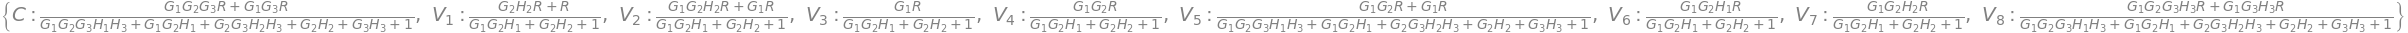

In [4]:
solucion = sympy.solve(ecs, incognitas)
solucion

De todas las incognitas halladas solo interesa la salida $C$.

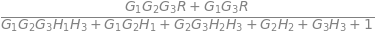

In [5]:
solucion[C]

Esta expresión puede factorizarse.

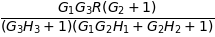

In [6]:
solucion[C].factor()

Observe que se ha encontrado una expresión para $C$ y el bloque equivalente debe ser $\frac{C}{R}$, es decir:


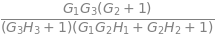

In [10]:
(solucion[C]/R).simplify().factor()


## Ejercicio para entregar

1. Reducir el siguiente diagrama.
![](figuras/ejercicio_bloques03.png)
2. Realice el ejercicio en papel y verifique su resultado con `Sympy`.
3. Documente el proceso y la comparación y suba un archivo pdf a la plataforma.